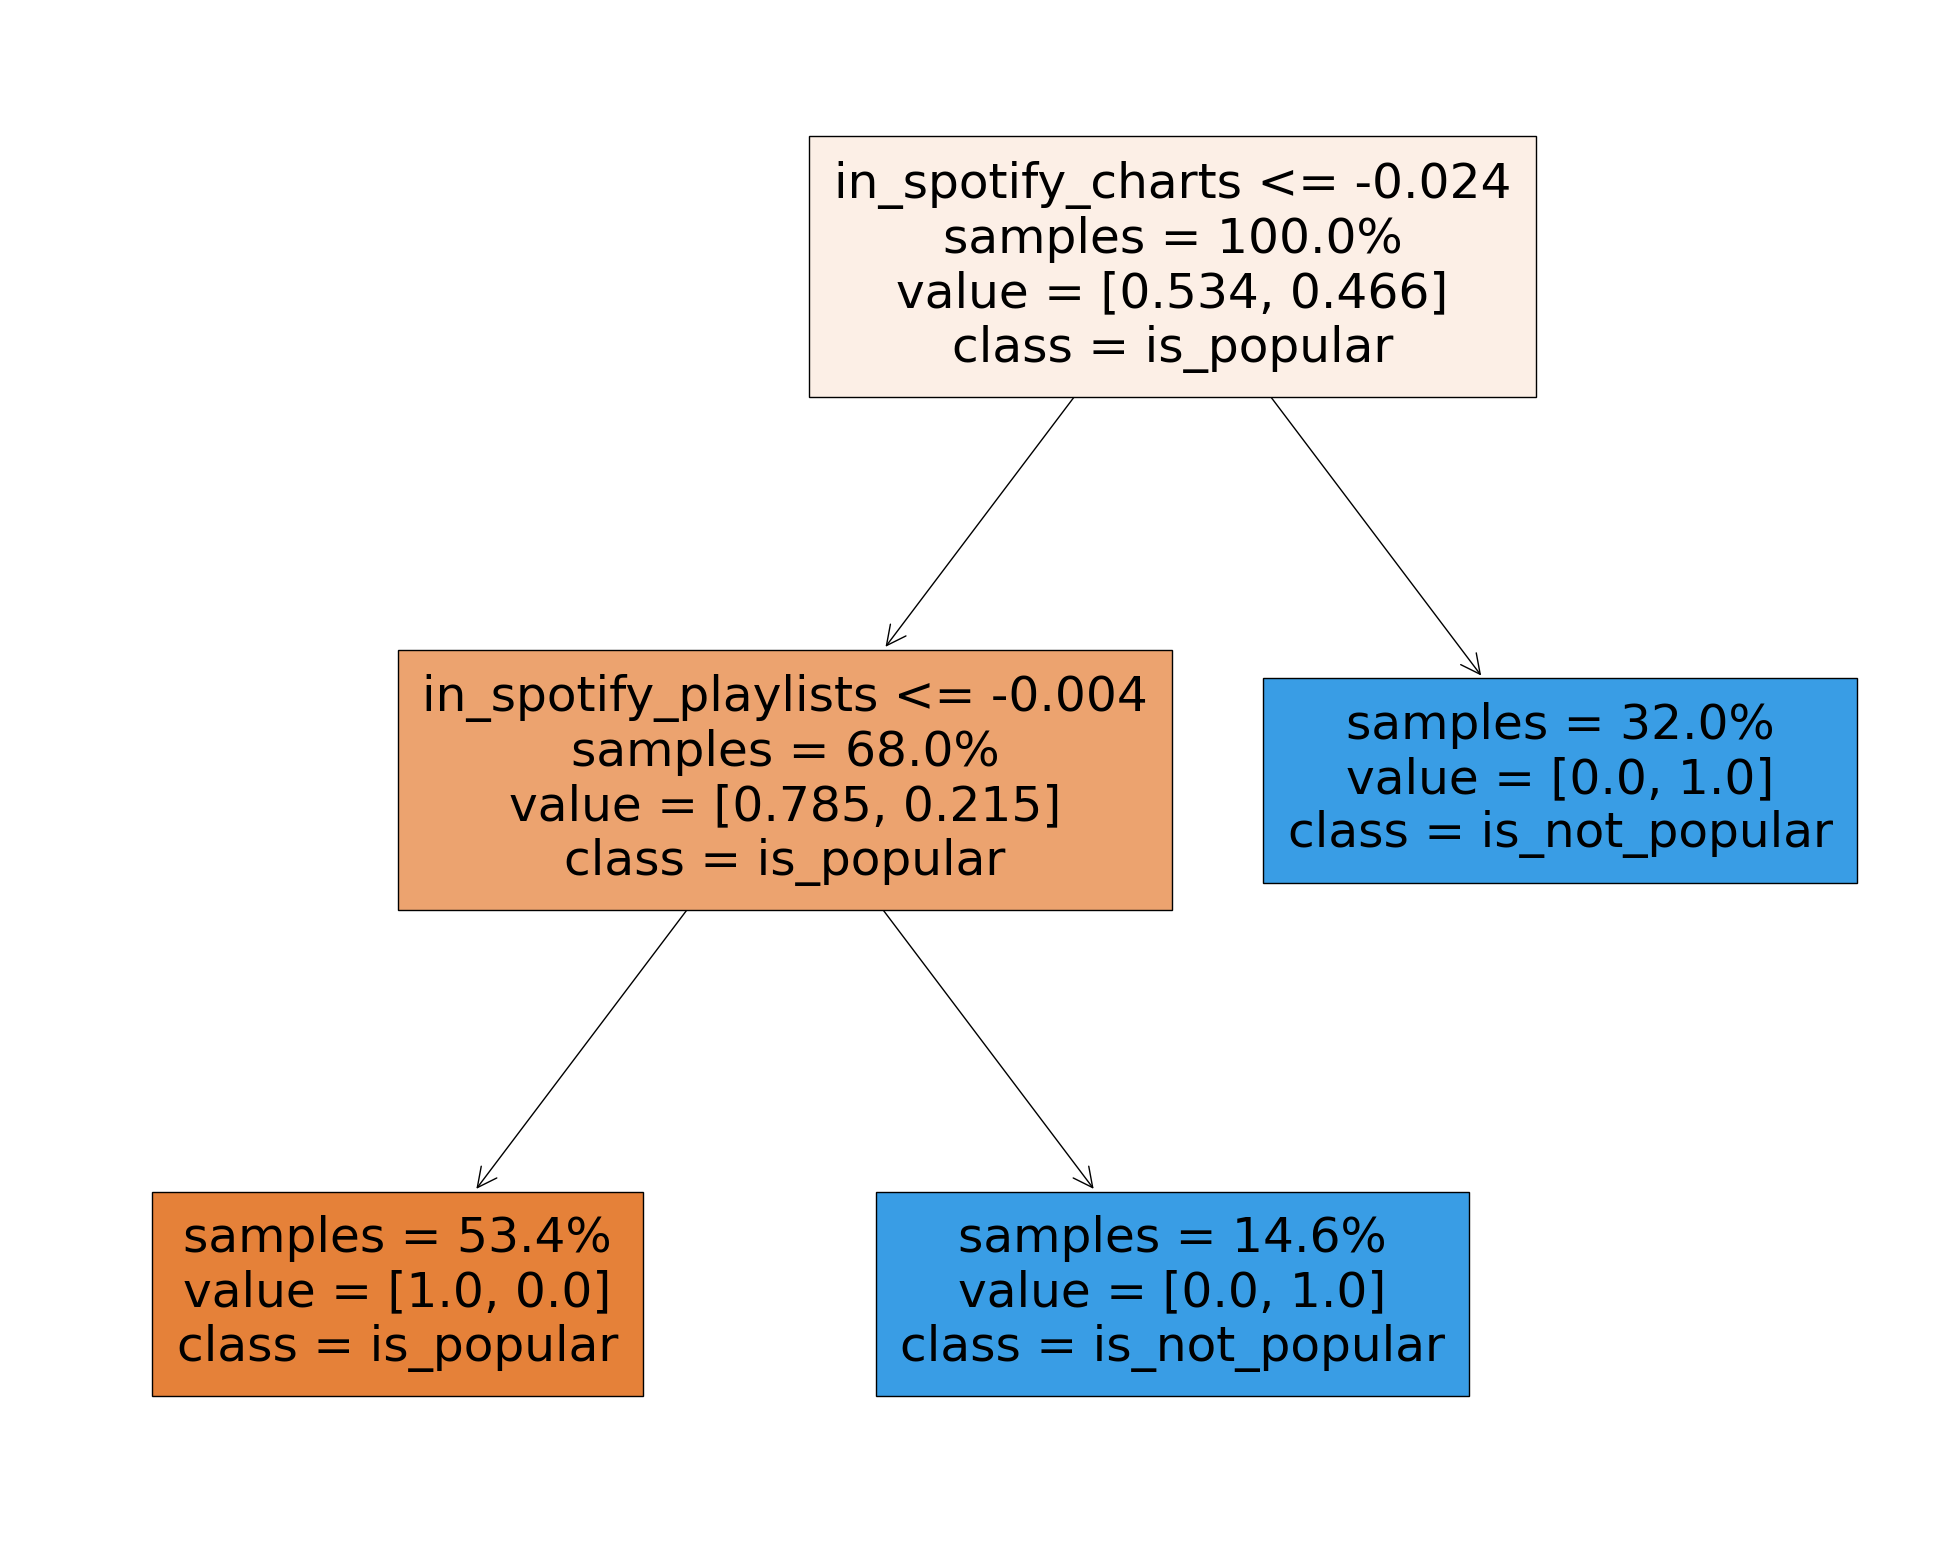

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[46  0]
 [ 0 48]]
train acc 1.0
test acc 1.0
Best Train Accuracy: 1.0
Best Test Accuracy: 1.0
Best Max Depth: 2


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Зчитування даних з файлу
data = pd.read_csv('spotify_EDA_data.csv', encoding="latin1", delimiter=",");

# Видалення зайвої ознаки
data = data.drop(columns="Unnamed: 0")

# Розбиття ознак 
data_x = data.drop('is_popular', axis=1)
data_y = data['is_popular']

# One-Hot-Encoding - заміна категоріальних значень за допомогою встроєної функції в pandas
data_x_encoded = pd.get_dummies(data_x, drop_first=True)
data_x_encoded.head()

# Розбиття dataset на тренувальні та тестові дані за допомогою train_test_split, який ми імпортували
X_train, X_test, y_train, y_test = train_test_split(data_x_encoded, data_y, test_size=0.3)

# Імпорт бібліотек для побудови Дерева Рішень
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Використання моделі рішень (Decision Tree) з максимальною глибиною 2.
dtree = DecisionTreeClassifier()

# Модель навчається (fit) на тренувальних даних (X_train, y_train),
# після чого робить передбачення (predict) для тренувальних даних (train_predictions)
# та тестових даних (test_predictions).
dtree.fit(X_train, y_train)
train_predictions = dtree.predict(X_train)
test_predictions = dtree.predict(X_test)

# Імпорт для побудови (графічно) Дерева Рішень
from sklearn.tree import plot_tree

# Конвертуємо індекс DataFrame в список назв ознак
feature_names = data_x_encoded.columns.tolist()

# Візуалізуємо дерево рішень
plt.figure(figsize=(25, 20))
plt.rcParams.update({'font.size': 8})
plot_tree(dtree, feature_names=feature_names, class_names=['is_popular', 'is_not_popular'],
          impurity=False, proportion=True, filled=True)

# Відображаємо візуалізоване дерево
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# 5.Розрахунок інших метрик якості
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Матриця плутанини
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# 6. Підбір оптимальних параметрів моделі
best_train_acc = 0
best_test_acc = 0
best_max_depth = 1

for depth in range(1, 11):
    dtree = DecisionTreeClassifier(max_depth=depth)
    dtree.fit(X_train, y_train)
    train_predictions = dtree.predict(X_train)
    test_predictions = dtree.predict(X_test)
    
    train_acc = accuracy_score(y_train, train_predictions)
    test_acc = accuracy_score(y_test, test_predictions)
    
    if test_acc > best_test_acc:
        best_test_acc = test_acc
        best_train_acc = train_acc
        best_max_depth = depth

# обчислюються показники точності моделі: для тренувальних даних (train_acc)
# та для тестових даних (test_acc) за допомогою функції accuracy_score,
# яка порівнює передбачені значення з реальними.

train_acc = accuracy_score(y_train, train_predictions)
test_acc = accuracy_score(y_test, test_predictions)

# Вивід показників точності
print("train acc", train_acc)
print("test acc", test_acc)

print("Best Train Accuracy:", best_train_acc)
print("Best Test Accuracy:", best_test_acc)
print("Best Max Depth:", best_max_depth)




In [5]:
# 7. Обрізка та перебудова дерева з оптимальною глибиною
pruned_dtree = DecisionTreeClassifier(max_depth=best_max_depth)

# Перебудова дерева з оптимальною глибиною
pruned_dtree.fit(X_train, y_train)

# Передбачення для тренувальних та тестових даних
pruned_train_predictions = pruned_dtree.predict(X_train)
pruned_test_predictions = pruned_dtree.predict(X_test)

# 8. Оцінка параметрів "оптимальної моделі"
print("Train Accuracy (pruned):", accuracy_score(y_train, pruned_train_predictions))
print("Test Accuracy (pruned):", accuracy_score(y_test, pruned_test_predictions))

# 9. Важливість ознак
feature_importance = dtree.feature_importances_
print("Feature Importance:")
for i, feature in enumerate(feature_names):
    if feature_importance[i] > 0.0:
        print(f"{feature}: {feature_importance[i]}")

Train Accuracy (pruned): 1.0
Test Accuracy (pruned): 1.0
Feature Importance:
in_spotify_playlists: 0.5005714285714286
in_spotify_charts: 0.4994285714285714


In [4]:
data.describe()

,streams,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,313.000000,313.000000,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02
mean,4.203987e+08,1.362063e-16,-7.491345e-16,-3.972683e-17,-5.249617e-17,3.972683e-17,4.540209e-17,3.405157e-17,0.000000,0.000000,5.675261e-17,4.653714e-16,-1.503944e-16,-6.952195e-17,2.270105e-17,1.702578e-17,-1.021547e-16,6.810314e-17
std,5.083439e+08,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,2.762000e+03,-5.898593e-01,-9.015675e+00,-1.463872e+00,-1.324704e+00,-6.086253e-01,-6.506132e-01,-7.591859e-01,-0.976007,-0.479699,-2.017278e+00,-3.757716e+00,-2.190235e+00,-2.986702e+00,-1.068174e+00,-1.352190e-01,-1.088257e+00,-9.190034e-01
25%,1.106500e+08,-5.898593e-01,1.154088e-01,-8.878919e-01,-1.015123e+00,-5.008677e-01,-6.506132e-01,-6.005331e-01,-0.856620,-0.479699,-8.635114e-01,-6.735018e-01,-6.671917e-01,-5.729350e-01,-7.984015e-01,-1.352190e-01,-6.178742e-01,-6.585313e-01
50%,2.313321e+08,-5.898593e-01,2.157504e-01,-3.119123e-01,-8.637939e-02,-3.675102e-01,-4.501782e-01,-4.052682e-01,-0.299483,-0.479699,-4.470948e-02,1.746572e-01,2.905669e-02,1.369963e-01,-3.038178e-01,-1.352190e-01,-4.162815e-01,-4.848832e-01
75%,5.536341e+08,1.202626e+00,3.160920e-01,8.400470e-01,9.455576e-01,9.656209e-02,3.515617e-01,1.927305e-01,0.615813,-0.168838,6.996559e-01,7.143947e-01,8.558517e-01,7.759345e-01,5.504632e-01,-1.352190e-01,4.572870e-01,5.570054e-01
max,2.808097e+09,2.995111e+00,3.160920e-01,1.704016e+00,1.771107e+00,7.255896e+00,6.715372e+00,5.245210e+00,4.257101,6.514664,2.783879e+00,1.870975e+00,1.856709e+00,2.124804e+00,3.113306e+00,1.295166e+01,5.228315e+00,4.464088e+00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            313 non-null    object 
 1   artist(s)_name        313 non-null    object 
 2   streams               313 non-null    int64  
 3   in_deezer_playlists   313 non-null    object 
 4   in_shazam_charts      313 non-null    object 
 5   key                   313 non-null    object 
 6   mode                  313 non-null    object 
 7   artist_count          313 non-null    float64
 8   released_year         313 non-null    float64
 9   released_month        313 non-null    float64
 10  released_day          313 non-null    float64
 11  in_spotify_playlists  313 non-null    float64
 12  in_spotify_charts     313 non-null    float64
 13  in_apple_playlists    313 non-null    float64
 14  in_apple_charts       313 non-null    float64
 15  in_deezer_charts      3

In [6]:
data['artist_count'].head()

0   -0.589859
1   -0.589859
2   -0.589859
3   -0.589859
4   -0.589859
Name: artist_count, dtype: float64

In [7]:
data

,track_name,artist(s)_name,streams,in_deezer_playlists,in_shazam_charts,key,mode,artist_count,released_year,released_month,...,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,is_popular
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",141381703,45,826,B,Major,-0.589859,0.316092,0.264067,...,1.074604,0.141382,0.637289,1.508585,1.130900,0.325652,-0.135219,-0.752269,-0.745355,True
1,Sprinter,"Dave, Central Cee",183706234,88,946,C#,Major,-0.589859,0.316092,-0.023922,...,2.162616,0.736874,1.562554,0.507727,-0.643928,-0.213893,-0.135219,-0.752269,0.991126,True
2,Ella Baila Sola,"Eslabon Armado, Peso Pluma",725980112,43,418,F,Minor,-0.589859,0.316092,-0.887892,...,1.540895,0.997402,-0.365080,1.247491,0.633948,1.090009,-0.135219,-0.752269,-0.832179,True
3,La Bebe - Remix,"Peso Pluma, Yng Lvcas",553634067,66,339,D,Minor,-0.589859,0.316092,-0.887892,...,1.540895,1.816204,0.714395,0.072572,-1.353859,-0.123969,-0.135219,-0.752269,1.772542,True
4,un x100to,"Bad Bunny, Grupo Frontera",505671438,54,251,F#,Minor,-0.589859,0.316092,-0.599902,...,1.385465,-1.421785,-1.136134,0.072572,0.349976,-0.034045,-0.135219,0.524485,-0.658531,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,Con La Brisa,"Ludwig Goransson, Foudeqush",71095708,7,0,D,Minor,-0.589859,0.215750,1.416027,...,-0.479699,-0.268019,-0.750607,-1.276409,-1.637832,1.224896,9.053443,-0.349084,-0.832179,False
309,Privileged Rappers,"Drake, 21 Savage",112436403,3,0,F,Major,-0.589859,0.215750,1.416027,...,-0.479699,0.848529,1.639659,0.333665,-0.430949,-1.068174,-0.135219,-0.483479,0.643829,False
310,Broke Boys,"Drake, 21 Savage",106249219,5,0,D,Major,-0.589859,0.215750,1.416027,...,-0.479699,-0.044709,-0.596396,-1.885626,-0.998894,-1.023212,-0.135219,0.390089,1.251598,False
311,A Veces (feat. Feid),"Feid, Paulo Londra",73513683,7,0,C#,Major,-0.589859,0.215750,1.416027,...,-0.479699,-1.086821,0.637289,1.160460,-0.004990,-0.888326,-0.135219,-0.752269,-0.571707,False
